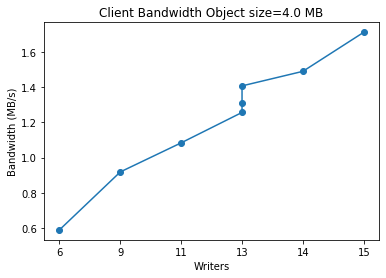

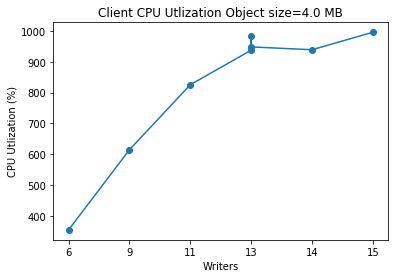

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

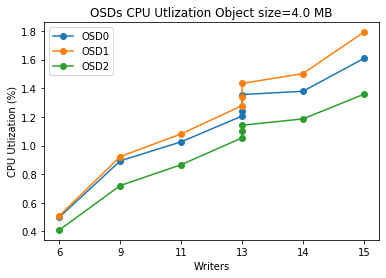

In [4]:
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

for file in glob.glob("output_*.csv"):
    data = read_csv(file)
    datalen = len(data.values)
    writers = []
    client_band = []
    client_utils = []
    obj_size = data.values[0,0]
    row_len = len(data.values[0])
    osds_utils=[[] for _ in range(row_len-3)]
    for i in range(datalen):
        writers.append(data.values[i,1])
        client_utils.append(data.values[i,2])
        client_band.append(data.values[i,3])
        for j in range(4, row_len):
            osds_utils[j-4].append(data.values[i,j])

    writers = [str(int(i)) for i in writers]
    plt.plot(writers, client_band, marker='o')
    plt.title('Client Bandwidth Object size='+str(obj_size)+' MB')
    plt.xlabel('Writers')
    plt.ylabel('Bandwidth (MB/s)')
    plt.show()

    plt.plot(writers, client_utils, marker='o')
    plt.title('Client CPU Utlization Object size='+str(obj_size)+' MB')
    plt.xlabel('Writers')
    plt.ylabel('CPU Utlization (%)')
    plt.show()

    for i in range(row_len-3):
        plt.plot(writers, osds_utils[i], marker='o', label='OSD'+str(i))
        plt.title('OSDs CPU Utlization Object size='+str(obj_size)+' MB')
        plt.xlabel('Writers')
        plt.ylabel('CPU Utlization (%)')
        plt.legend(loc='best')
    plt.show()
plt.close()
